In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import torch
from celluloid import Camera
from matplotlib.backend_bases import FigureCanvasBase
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import timeit

from src.environment_old import LogEnv_old
from src.utils import path_distance_new

from src.or_functions import compute_distance

#from src.environment import LogEnv
#from src.train import train
#from src.architecture import AttentionModel
#from src.evaluation import compute_mean_metric, compute_data_metric, compute_mean_metric_with_or
#from src.vizualisation import demonstration, action_animation
from src.environment_jampr import LogEnv
from src.architecture_jampr_2 import AttentionModel
from src.train_jampr import train
from src.evaluation_jampr import compute_mean_metric, compute_mean_metric_with_or
from src.vizualisation_jampr import demonstration

## Обучение

In [19]:
model = AttentionModel()
model = model.to('cuda')

In [20]:
%%time
_ = train(model, device="cuda", batch_size=1, epochs=1, T=40, lr=1e-4, problem_size=20, decay=0.001)







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [03:17<00:00, 197.26s/it]





                                                                                                                       

[tensor(1973.2534), tensor(1960.4856), tensor(2201.2292), tensor(2300.4255), tensor(2313.2048), tensor(2041.5723), tensor(2148.1226), tensor(2307.2373), tensor(2038.7473), tensor(2021.9648), tensor(1826.7351), tensor(1991.7314), tensor(2037.8456), tensor(1735.7266), tensor(2010.3728), tensor(2155.5132), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2029.7473), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.), tensor(2000.)]
Wall time: 3min 17s


## Анимация

In [ ]:
opts = {'demand_type': {'distribution': 'uniform', 'max_demand':10},
        #'tw_type': {'distribution': 'uniform'},
        #"pickup_and_delivery":True
       }

n = 10
batch_size = 1
env = LogEnv(batch_size=batch_size, n=n, opts=opts)

features, distances, mask = env.reset()

demonstration(env, opts)

In [ ]:
actions_ext = np.array([2, 7, 3, 5, 1, 0, 6, 8, 9, 4])
action_animation(env, opts, actions_ext, '1-OtOPDTW.gif', 500)

## Проверка модели CVRP, обученной на сервере

In [ ]:
# DTSP_20_Dec_20_21_14_09_2020.pkl
#
# TWTSP_20_Dec_24_05_51_22_2020.pkl
# 
# PDTSP_20_Dec_23_07_07_17_2020.pkl
#

In [6]:
file_name = 'JAMPR_TW1_20_Jan_15_21_11_17_2021'

In [7]:
f = open('./models/' + file_name + '.pkl', 'rb')
weights = pickle.load(f)
f.close()

In [8]:
f = open('./models/' + file_name + '_loss.pkl', 'rb')
loss = pickle.load(f)
f.close()

In [9]:
f = open('./models/' + file_name + '_reward.pkl', 'rb')
reward = pickle.load(f)
f.close()

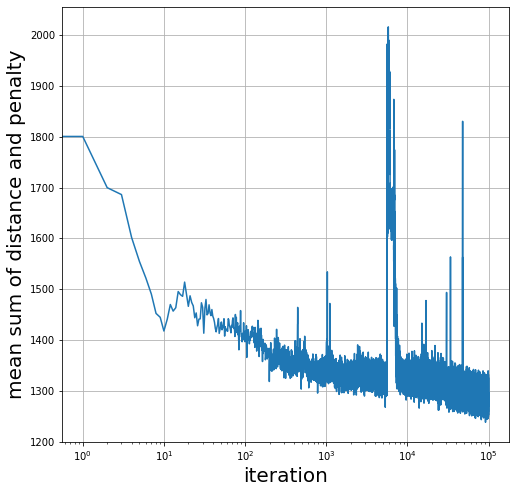

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(reward)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean sum of distance and penalty', fontsize=20)
plt.grid()
fig.savefig('reward_20_twtsp.png')

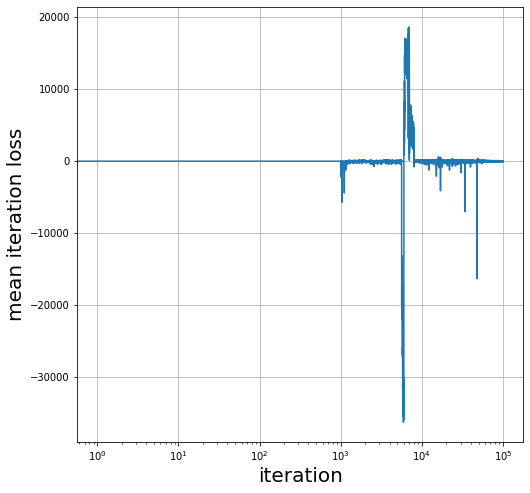

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(loss)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('mean iteration loss', fontsize=20)
plt.grid()
fig.savefig('loss_20_twtsp.png')

In [10]:
model = AttentionModel().to("cuda")
model.load_state_dict(weights)

<All keys matched successfully>

In [11]:
model.eval()
print('r')

r


In [ ]:
%%time
compute_mean_metric(model, device="cuda", n=20, batch_size=1, T=100, sample=True)







  0%|                                                                                          | 0/100 [00:00<?, ?it/s]





  1%|▊                                                                                 | 1/100 [00:04<06:41,  4.06s/it]





  2%|█▋                                                                                | 2/100 [00:08<06:37,  4.06s/it]





  3%|██▍                                                                               | 3/100 [00:12<06:32,  4.05s/it]





  4%|███▎                                                                              | 4/100 [00:16<06:28,  4.05s/it]





  5%|████                                                                              | 5/100 [00:20<06:23,  4.04s/it]





  6%|████▉                                                                             | 6/100 [00:24<06:18,  4.03s/it]





  7%|█████▋                                                                            | 7/100 [00:28<06:14,  4.03s/it]

In [16]:
%%time
compute_mean_metric_with_or(model, device="cuda", n=20, batch_size=10, T=1, time_limit=7, eps=1e-2)

tensor(3421.0105, device='cuda:0')
3397.7200000000003
3017.26
4409.18
4575.81
4652.63
4363.9
4473.46
3960.51
3583.48
3830.79
Wall time: 1min 16s


(1328.126220703125, 4026.4740000000006)

In [21]:
device = 'cuda'

In [47]:
env = LogEnv(n=20, batch_size=1)
env.reset()
print('ready')

ready


not attended vertexes: None


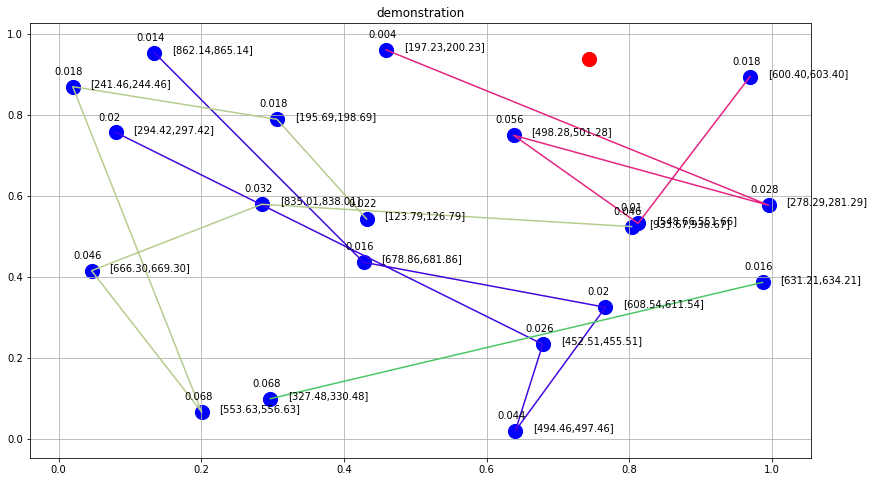

In [48]:
demonstration(env, model, device)